# Libraries

In [2]:
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing

In [3]:
sales = pd.read_parquet("sale_data.parquet")
cities = gp.read_file("zip://gadm36_TUR_1.zip")

In [4]:
cities_sorted = sales["City"].unique()
cities_sorted.sort()
cities_sorted

array(['Adana', 'Adıyaman', 'Afyon', 'Afyonkarahisar', 'Aksaray',
       'Amasya', 'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydın',
       'Ağrı', 'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik',
       'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Denizli',
       'Diyarbakır', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum',
       'Eskişehir', 'Gaziantep', 'Giresun', 'Gümüşhane', 'Hakkâri',
       'Hatay', 'Isparta', 'Iğdır', 'Kahramanmaraş', 'Karabük', 'Karaman',
       'Kars', 'Kastamonu', 'Kayseri', 'Kilis', 'Kocaeli', 'Konya',
       'Kütahya', 'Kırklareli', 'Kırıkkale', 'Kırşehir', 'Malatya',
       'Manisa', 'Mardin', 'Mersin', 'Mersin (İçel)', 'Muğla', 'Muş',
       'Nevşehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya',
       'Samsun', 'Siirt', 'Sinop', 'Sivas', 'Tekirdağ', 'Tokat',
       'Trabzon', 'Tunceli', 'Uşak', 'Van', 'Yalova', 'Yozgat',
       'Zonguldak', 'Çanakkale', 'Çankırı', 'Çorum', 'İstanbul', 'İzmir',
       'Şanlıurfa', 'Şırnak'], dtype=ob

In [5]:
errors = list((set(cities_sorted) - set(cities["NAME_1"])).union(set(cities["NAME_1"]) - set(cities_sorted)))
errors

['Şırnak',
 'Eskisehir',
 'Agri',
 'Kirklareli',
 'İzmir',
 'Çankırı',
 'Hakkari',
 'Kirsehir',
 'Eskişehir',
 'Adiyaman',
 'Çankiri',
 'Mus',
 'Kırklareli',
 'Nigde',
 'Balikesir',
 'Uşak',
 'Kahramanmaraş',
 'Muş',
 'K. Maras',
 'Istanbul',
 'Kırıkkale',
 'Niğde',
 'Kinkkale',
 'Tekirdağ',
 'Diyarbakir',
 'Ağrı',
 'Gümüşhane',
 'Diyarbakır',
 'Balıkesir',
 'Afyonkarahisar',
 'Usak',
 'Nevsehir',
 'Adıyaman',
 'Izmir',
 'Kırşehir',
 'Şanlıurfa',
 'Aydın',
 'Mersin (İçel)',
 'Nevşehir',
 'Sanliurfa',
 'İstanbul',
 'Zonguldak',
 'Mugla',
 'Sirnak',
 'Aydin',
 'Hakkâri',
 'Gümüshane',
 'Muğla',
 'Tekirdag',
 'Zinguldak']

In [6]:
cities["NAME_1"].unique()

array(['Adana', 'Adiyaman', 'Afyon', 'Agri', 'Aksaray', 'Amasya',
       'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydin', 'Balikesir',
       'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis',
       'Bolu', 'Burdur', 'Bursa', 'Çanakkale', 'Çankiri', 'Çorum',
       'Denizli', 'Diyarbakir', 'Düzce', 'Edirne', 'Elazığ', 'Erzincan',
       'Erzurum', 'Eskisehir', 'Gaziantep', 'Giresun', 'Gümüshane',
       'Hakkari', 'Hatay', 'Iğdır', 'Isparta', 'Istanbul', 'Izmir',
       'K. Maras', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri',
       'Kilis', 'Kinkkale', 'Kirklareli', 'Kirsehir', 'Kocaeli', 'Konya',
       'Kütahya', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Mugla', 'Mus',
       'Nevsehir', 'Nigde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya',
       'Samsun', 'Sanliurfa', 'Siirt', 'Sinop', 'Sirnak', 'Sivas',
       'Tekirdag', 'Tokat', 'Trabzon', 'Tunceli', 'Usak', 'Van', 'Yalova',
       'Yozgat', 'Zinguldak'], dtype=object)

In [7]:
cities_mapping = {'Adiyaman': "Adıyaman", 'Afyon':"Afyonkarahisar", 'Aydin':"Aydın",
                  'Agri':"Ağrı", 'Balikesir': "Balıkesir", 'Çankiri': "Çankırı",
                  'Diyarbakir':"Diyarbakır", 'Eskisehir':"Eskişehir", 'Gümüshane':"Gümüşhane",
                  'Hakkâri':"Hakkari", 'Istanbul':"İstanbul", 'Izmir':"İzmir", 'K. Maras':"Kahramanmaraş",
                  'Kinkkale':"Kırıkkale", 'Kirklareli':"Kırklareli", 'Kirsehir':"Kırşehir",
                  'Mersin (İçel)':"Mersin", 'Mugla':"Muğla", 'Mus':"Muş", 'Nevsehir':"Nevşehir",
                  'Nigde':"Niğde", 'Sanliurfa':"Şanlıurfa", 'Sirnak':"Şırnak", 'Tekirdag':"Tekirdağ",
                  'Usak':"Uşak", 'Zinguldak':"Zonguldak"}

In [8]:
for i in errors:
    if (i not in cities_mapping.keys()) and (i not in cities_mapping.values()):
        print(i)

# No mismatches left

In [9]:
sales = sales.replace({"City": cities_mapping})
cities = cities.replace({"NAME_1": cities_mapping})
cities = cities.rename(columns={'NAME_1': 'City'})

In [13]:
sales["PromoRatio"] = sales.FreeQty/(sales.PaidQty+sales.FreeQty)

In [15]:
sales_groupby_city = sales[["City", "PaidQty", "FreeQty", "PromoRatio"]].groupby(['City']).mean()
sales_groupby_city.head()

,PaidQty,FreeQty,PromoRatio
City,,,
Adana,5.687513,0.419360,0.023416
Adıyaman,5.451415,0.283827,0.017398
Afyonkarahisar,7.726765,0.866945,0.038510
Aksaray,6.705936,0.738682,0.031106
Amasya,5.930741,0.418632,0.025836


In [16]:
merged_data = cities[["City", "geometry"]].merge(sales_groupby_city, on='City')

In [17]:
merged_data.head()

,City,geometry,PaidQty,FreeQty,PromoRatio
0,Adana,"MULTIPOLYGON (((35.20958 36.67875, 35.20958 36...",5.687513,0.419360,0.023416
1,Adıyaman,"POLYGON ((38.68339 37.60323, 38.66182 37.59428...",5.451415,0.283827,0.017398
2,Afyonkarahisar,"POLYGON ((30.18261 37.90116, 30.18878 37.89117...",7.726765,0.866945,0.038510
3,Ağrı,"POLYGON ((43.71635 39.37020, 43.70746 39.36575...",5.963256,0.504012,0.031516
4,Aksaray,"POLYGON ((34.39513 38.19467, 34.39626 38.18270...",6.705936,0.738682,0.031106


# Visualizations

<Axes: >

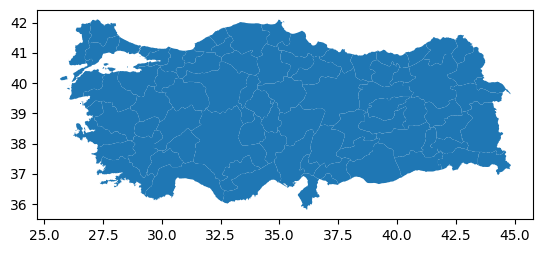

In [18]:
merged_data.plot()

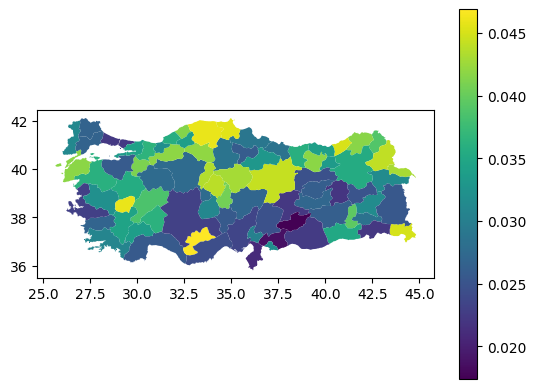

In [22]:
ax = merged_data.plot(column='PromoRatio', legend=True)